## Problem Statement:


**An automobile parts manufacturing company has collected data of transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your magical data science skills to provide them with suitable insights about their data and their customers.**

Auto Sales Data: **Sales_Data.xlsx**

**Data Dictionary:**

ORDERNUMBER :Order Number

CUSTOMERNAME :customer

QUANTITYORDERED :Quantity ordered

PHONE :Phone of the customer

PRICEEACH :Price of Each item

ADDRESSLINE1 :Address of customer

ORDERLINENUMBER :order line

CITY :City of customer

SALES :Sales amount

POSTALCODE :Postal Code of customer

ORDERDATE :Order Date

COUNTRY :Country customer

DAYS_SINCE_LASTORDER :Days_ Since_Lastorder

CONTACTLASTNAME :Contact person customer

STATUS :Status of order like Shipped or not

CONTACTFIRSTNAME :Contact person customer

PRODUCTLINE :Product line – CATEGORY

DEALSIZE :Size of the deal based on Quantity and Item Price

MSRP :Manufacturer's Suggested Retail Price

PRODUCTCODE :Code of Product

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import re
import seaborn as sns
print('seaborn versiont:',sns.__version__)
import os
import warnings
warnings.filterwarnings('ignore') 

seaborn versiont: 0.11.2


In [2]:
df=pd.read_excel("Sales_Data.xlsx")

In [3]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium


In [4]:
df.tail()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2742,10350,20,112.22,15,2244.40,2019-12-02,2924,Shipped,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Small
2743,10373,29,137.19,1,3978.51,2020-01-31,2865,Shipped,Ships,54,S72_3212,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,Oulu,90110,Finland,Koskitalo,Pirkko,Medium
2744,10386,43,125.99,4,5417.57,2020-03-01,2836,Resolved,Ships,54,S72_3212,Euro Shopping Channel,(91) 555 94 44,"C/ Moralzarzal, 86",Madrid,28034,Spain,Freyre,Diego,Medium
2745,10397,34,62.24,1,2116.16,2020-03-28,2810,Shipped,Ships,54,S72_3212,Alpha Cognac,61.77.6555,1 rue Alsace-Lorraine,Toulouse,31000,France,Roulet,Annette,Small
2746,10414,47,65.52,9,3079.44,2020-05-06,2772,On Hold,Ships,54,S72_3212,Gifts4AllAges.com,6175559555,8616 Spinnaker Dr.,Boston,51003,USA,Yoshido,Juri,Medium


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [7]:
df.dtypes

ORDERNUMBER                      int64
QUANTITYORDERED                  int64
PRICEEACH                      float64
ORDERLINENUMBER                  int64
SALES                          float64
ORDERDATE               datetime64[ns]
DAYS_SINCE_LASTORDER             int64
STATUS                          object
PRODUCTLINE                     object
MSRP                             int64
PRODUCTCODE                     object
CUSTOMERNAME                    object
PHONE                           object
ADDRESSLINE1                    object
CITY                            object
POSTALCODE                      object
COUNTRY                         object
CONTACTLASTNAME                 object
CONTACTFIRSTNAME                object
DEALSIZE                        object
dtype: object

In [9]:
df.shape

(2747, 20)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747.0,10259.761558,91.877521,10100.00,10181.000,10264.00,10334.500,10425.00
QUANTITYORDERED,2747.0,35.103021,9.762135,6.00,27.000,35.00,43.000,97.00
PRICEEACH,2747.0,101.098951,42.042548,26.88,68.745,95.55,127.100,252.87
ORDERLINENUMBER,2747.0,6.491081,4.230544,1.00,3.000,6.00,9.000,18.00
SALES,2747.0,3553.047583,1838.953901,482.13,2204.350,3184.80,4503.095,14082.80
DAYS_SINCE_LASTORDER,2747.0,1757.085912,819.280576,42.00,1077.000,1761.00,2436.500,3562.00
MSRP,2747.0,100.691664,40.114802,33.00,68.000,99.00,124.000,214.00


In [12]:
df.isnull().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

## EDA

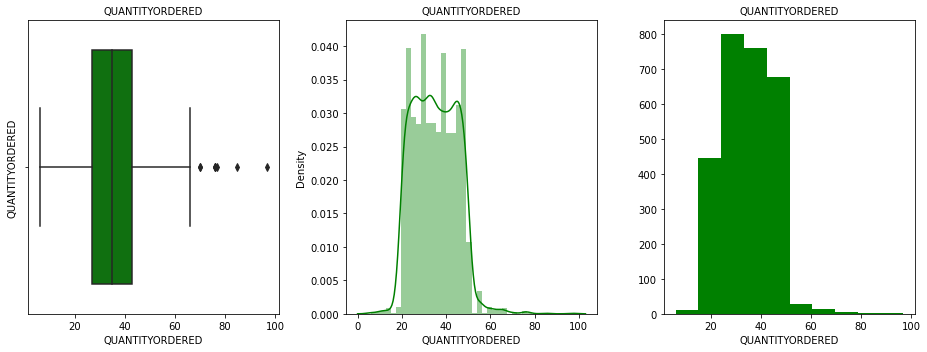

In [20]:
# UNIVARIATE ANALYSIS

fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='QUANTITYORDERED',data=df,orient='v',ax=ax1, color='Green')
ax1.set_ylabel('QUANTITYORDERED', fontsize=10)
ax1.set_title('QUANTITYORDERED', fontsize=10)
ax1.tick_params(labelsize=10)

#distplot
sns.distplot(df['QUANTITYORDERED'],ax=ax2, color='Green')
ax2.set_xlabel('QUANTITYORDERED', fontsize=10)
ax2.set_title('QUANTITYORDERED', fontsize=10)
ax2.tick_params(labelsize=10)

#histogram
ax3.hist(df['QUANTITYORDERED'], color='Green')
ax3.set_xlabel('QUANTITYORDERED', fontsize=10)
ax3.set_title('QUANTITYORDERED', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

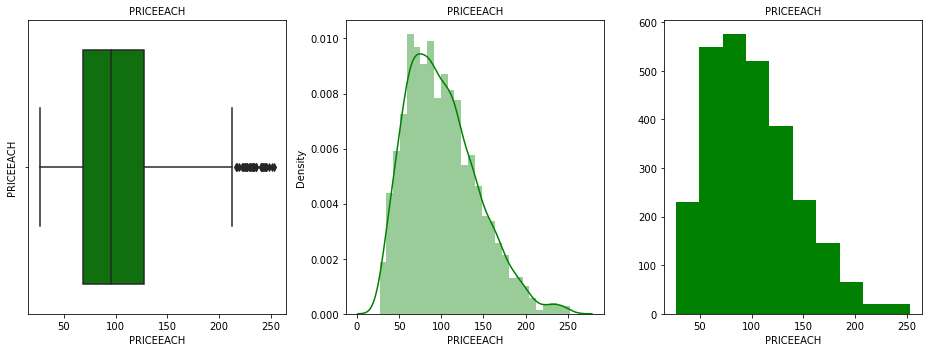

In [19]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='PRICEEACH',data=df,orient='v',ax=ax1, color='Green')
ax1.set_ylabel('PRICEEACH', fontsize=10)
ax1.set_title('PRICEEACH', fontsize=10)
ax1.tick_params(labelsize=10)

#distplot
sns.distplot(df['PRICEEACH'],ax=ax2, color='Green')
ax2.set_xlabel('PRICEEACH', fontsize=10)
ax2.set_title('PRICEEACH', fontsize=10)
ax2.tick_params(labelsize=10)

#histogram
ax3.hist(df['PRICEEACH'], color='Green')
ax3.set_xlabel('PRICEEACH', fontsize=10)
ax3.set_title('PRICEEACH', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

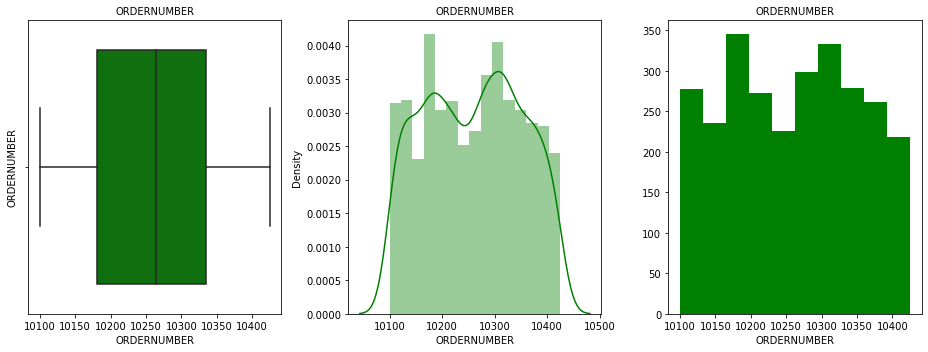

In [22]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='ORDERNUMBER',data=df,orient='v',ax=ax1, color='Green')
ax1.set_ylabel('ORDERNUMBER', fontsize=10)
ax1.set_title('ORDERNUMBER', fontsize=10)
ax1.tick_params(labelsize=10)

#distplot
sns.distplot(df['ORDERNUMBER'],ax=ax2, color='Green')
ax2.set_xlabel('ORDERNUMBER', fontsize=10)
ax2.set_title('ORDERNUMBER', fontsize=10)
ax2.tick_params(labelsize=10)

#histogram
ax3.hist(df['ORDERNUMBER'], color='Green')
ax3.set_xlabel('ORDERNUMBER', fontsize=10)
ax3.set_title('ORDERNUMBER', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()


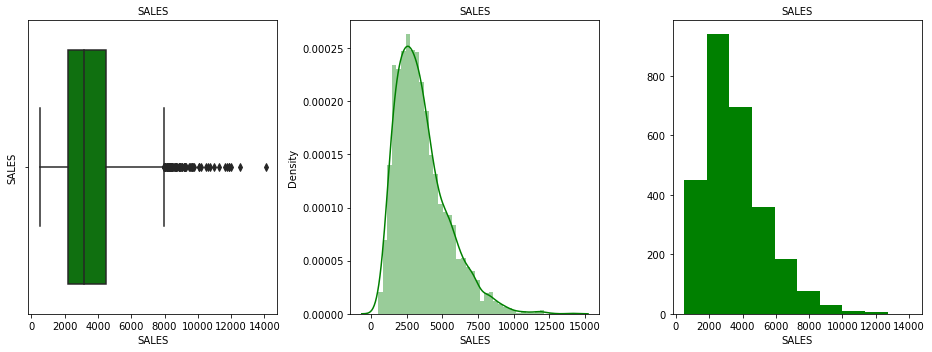

In [23]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='SALES',data=df,orient='v',ax=ax1, color='Green')
ax1.set_ylabel('SALES', fontsize=10)
ax1.set_title('SALES', fontsize=10)
ax1.tick_params(labelsize=10)

#distplot
sns.distplot(df['SALES'],ax=ax2, color='Green')
ax2.set_xlabel('SALES', fontsize=10)
ax2.set_title('SALES', fontsize=10)
ax2.tick_params(labelsize=10)

#histogram
ax3.hist(df['SALES'], color='Green')
ax3.set_xlabel('SALES', fontsize=10)
ax3.set_title('SALES', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

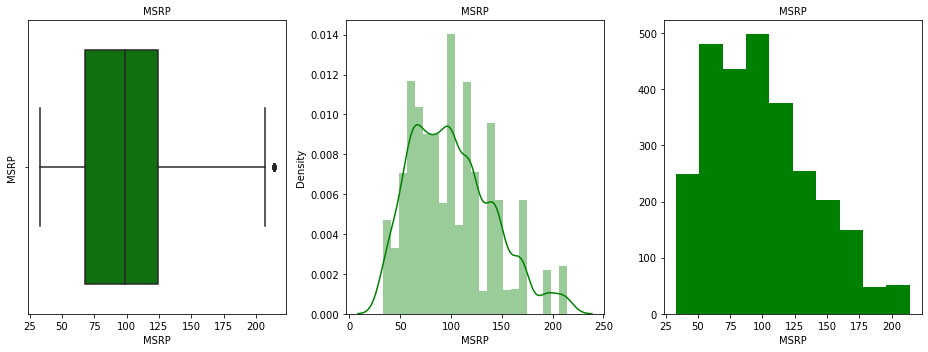

In [24]:
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(13,5))

#boxplot
sns.boxplot(x='MSRP',data=df,orient='v',ax=ax1, color='Green')
ax1.set_ylabel('MSRP', fontsize=10)
ax1.set_title('MSRP', fontsize=10)
ax1.tick_params(labelsize=10)

#distplot
sns.distplot(df['MSRP'],ax=ax2, color='Green')
ax2.set_xlabel('MSRP', fontsize=10)
ax2.set_title('MSRP', fontsize=10)
ax2.tick_params(labelsize=10)

#histogram
ax3.hist(df['MSRP'], color='Green')
ax3.set_xlabel('MSRP', fontsize=10)
ax3.set_title('MSRP', fontsize=10)
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()

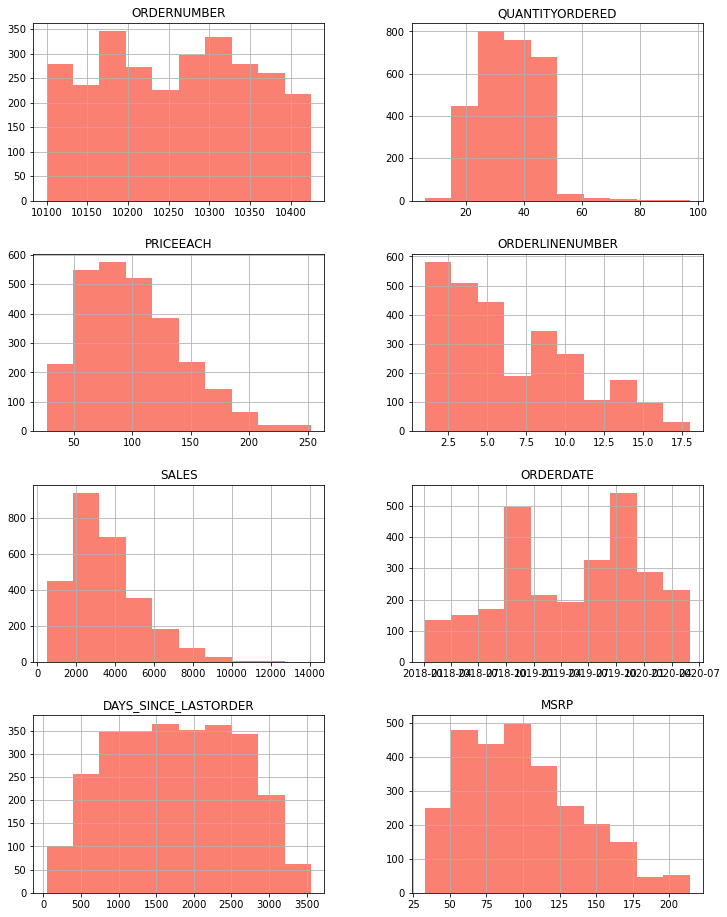

In [27]:
df.hist(figsize=(12,16),layout=(4,2), color='Salmon' );

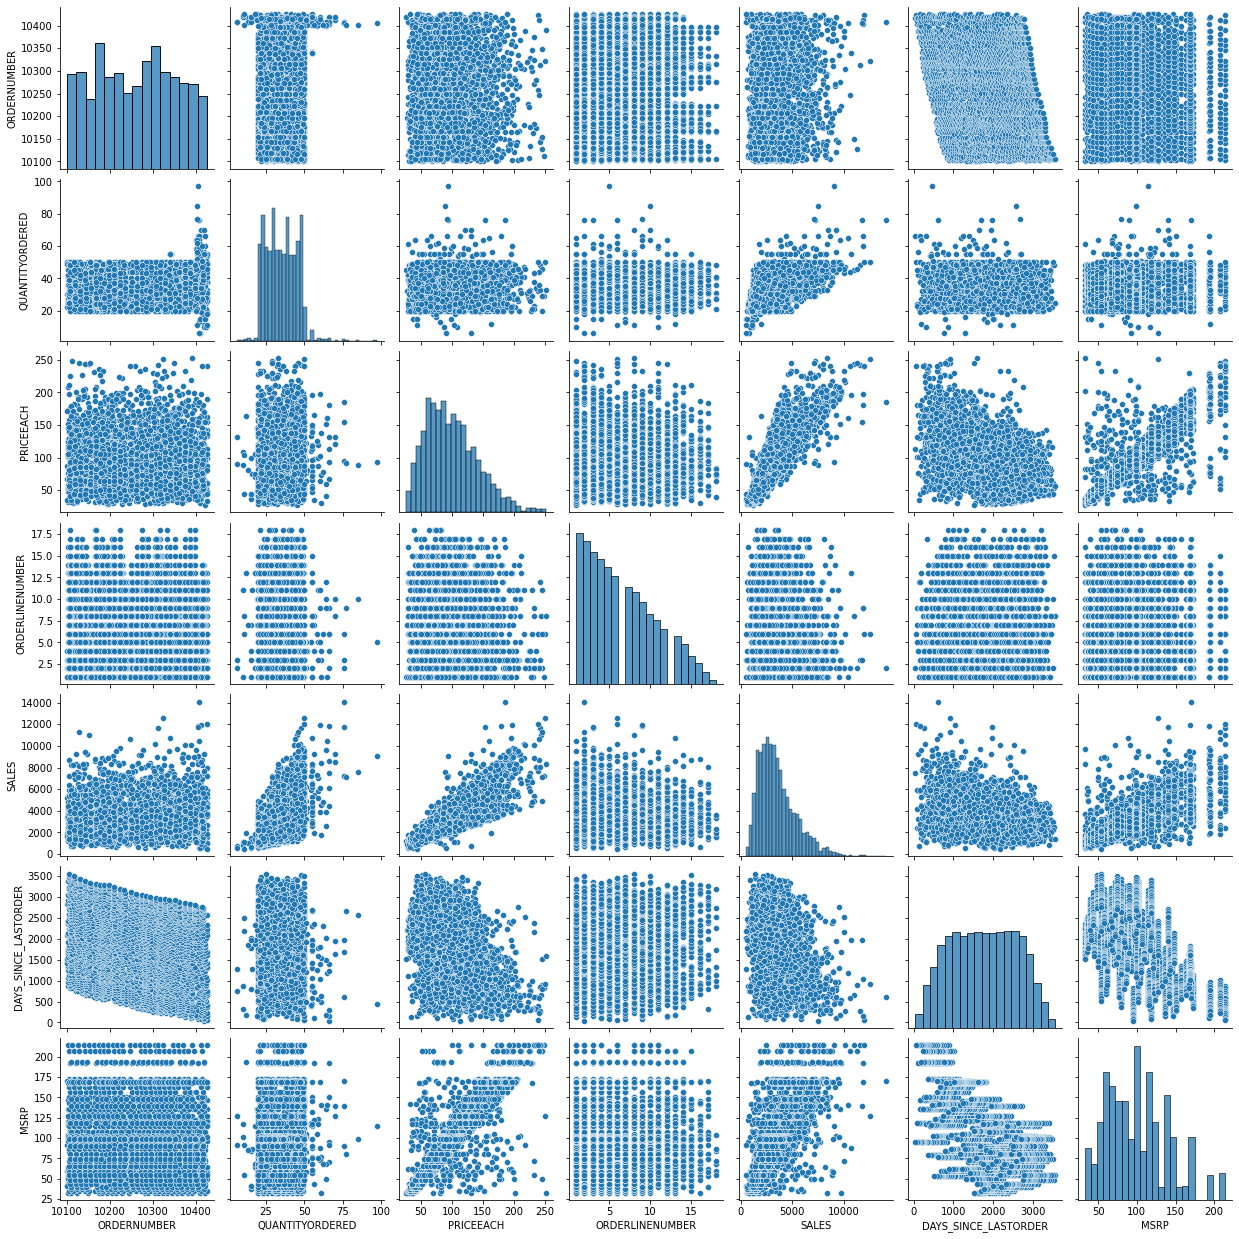

In [28]:
# MULTIVARIATE ANALYSIS

sns.pairplot(df);

In [29]:
# CORRELATION

df.corr().T

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,DAYS_SINCE_LASTORDER,MSRP
ORDERNUMBER,1.000000,0.067110,-0.003369,-0.054300,0.037289,-0.251476,-0.013910
QUANTITYORDERED,0.067110,1.000000,0.010161,-0.016295,0.553359,-0.021923,0.020551
PRICEEACH,-0.003369,0.010161,1.000000,-0.052646,0.808287,-0.397092,0.778393
ORDERLINENUMBER,-0.054300,-0.016295,-0.052646,1.000000,-0.057414,0.046615,-0.020956
SALES,0.037289,0.553359,0.808287,-0.057414,1.000000,-0.334274,0.634849
DAYS_SINCE_LASTORDER,-0.251476,-0.021923,-0.397092,0.046615,-0.334274,1.000000,-0.524285
MSRP,-0.013910,0.020551,0.778393,-0.020956,0.634849,-0.524285,1.000000


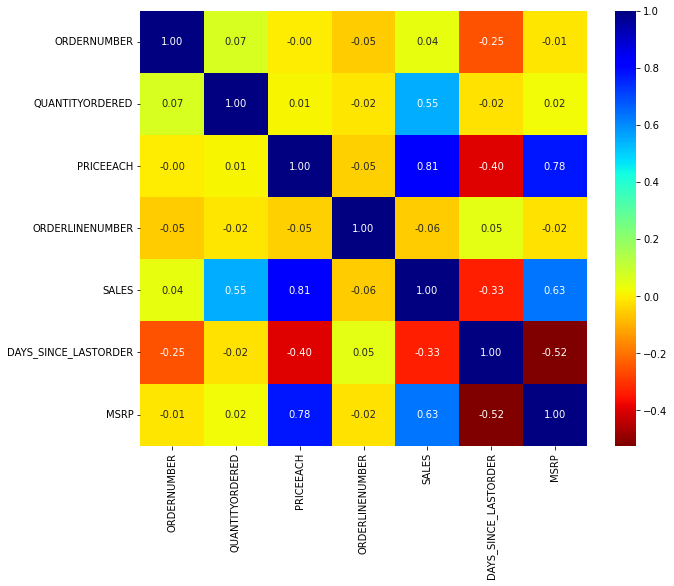

In [30]:
#creating a heatmap for better visualization

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="jet_r")
plt.show()

<AxesSubplot:>

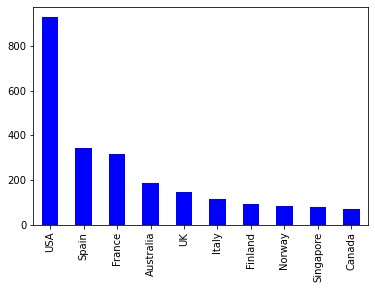

In [31]:
df.COUNTRY.value_counts()[:10].plot(kind='bar', color='BLUE')

We can see here that most of the customers are from USA.

## CONCLUSION

We have worked with the dataset first like knew About Data like Info, Shape, Summary Stats etc.Then performed EDA(univariate and multivariate analysis).
